# Turing Instability in Reaction–Diffusion Systems

The following is an in‐depth derivation and explanation of the conditions under which a two‐species reaction–diffusion system can exhibit a Turing instability, leading to spontaneous pattern formation.

---

## 1. The Reaction–Diffusion System and Its Steady State

We consider a general two‐species reaction–diffusion system given by:

- **Activator:**

  $\dot{u} = \nabla^2 u + f(u, v)$

- **Inhibitor:**

  $\dot{v} = d\, \nabla^2 v + g(u, v)$


where:
- $u$ and $v$ are the concentrations of the chemical species,
- $ d $ is the relative diffusion coefficient for the inhibitor compared to the activator (operating in nondimensional space).

A **homogeneous steady state** is obtained when:

$
f(u^*, v^*) = 0 \quad \text{and} \quad g(u^*, v^*) = 0,
$

i.e., when $ u = u^* $ and $ v = v^* $.

---

## 2. Linear Stability Analysis and Turing Conditions

To investigate the stability of the steady state against spatial perturbations, we introduce small perturbations as follows:

$
u = u^* + \tilde{u}\, e^{i(k_x x + k_y y)}, \quad v = v^* + \tilde{v}\, e^{i(k_x x + k_y y)},
$

where $ k = \sqrt{k_x^2 + k_y^2} $ is the magnitude of the perturbation’s wave number.

By substituting these expressions into the reaction–diffusion equations and linearizing (retaining only first-order terms), we derive a dispersion relation. The eigenvalues $\lambda(k)$ obtained from this relation indicate the growth (or decay) rate of a perturbation of spatial frequency $k$.

The **Turing instability** (diffusion-driven instability) requires the following conditions:

1. $ f_u + g_v < 0 $  
   *Ensures that the uniform state is stable in the absence of diffusion.*

2. $ f_u g_v - f_v g_u > 0 $  
   *A requirement on the cross-coupling between activator and inhibitor.*

3. $ d\, f_u + g_v > 0 $  
   *Reflects the impact of diffusion on the stability of the homogeneous state.*

4. $\displaystyle (d\, f_u + g_v)^2 - 4d(f_u g_v - f_v g_u) > 0$  
   *Guarantees that the quadratic dispersion relation has real roots, i.e., there exists at least one mode with a positive growth rate.*

A significant consequence of conditions (i) and (iii) is that $ d \neq 1 $. Moreover:
- If $ f_u > 0 $ (activator is self-enhancing), then $ d > 1 $ (inhibitor diffuses faster than the activator).
- If $ f_u < 0 $, then $ d < 1 $.

This means that for patterns to form, **a relatively slow-diffusing activator and a fast-diffusing inhibitor are required**.

---

## 3. Maximum Growth Rate and the Role of Inhibitor Diffusion

When the Turing conditions hold, a range of spatial frequencies $ k $ become unstable. The growth rate $\lambda(k)$ for a perturbation with wave number $ k $ is described by the dispersion relation.

In particular, the **maximum growth rate** $\lambda(k^*)$ is given by:

$ \displaystyle
\lambda(k^*) = \frac{1}{2} \left[ (f_u + g_v) + \frac{d+1}{d-1}(f_u - g_v) - \frac{4d}{d-1}\sqrt{-\frac{f_v g_u}{d}} \,\right],
$

with the corresponding dominant frequency (wave number):

$ \displaystyle
k^* = \sqrt{ -\frac{f_u - g_v}{d-1} + \frac{d+1}{d-1}\sqrt{\frac{- f_v g_u}{d}} }.
$

Although the full expression under the square root is abbreviated here as “$\sqrt{\ldots}$”, the key point is that both $\lambda(k^*)$ and $k^*$ depend on the reaction derivatives $f_u$, $f_v$, $g_u$, and $g_v$ as well as on the diffusion coefficient $d$.

By differentiating the maximum growth rate with respect to $ d $:

$\displaystyle
\partial_d \lambda(k^*) = \frac{1}{2(d-1)^2} \left[ - (f_u - g_v) + (d+1) \sqrt{\frac{-f_vg_u}{d}} \right],
$

we find that for the case $ f_u > 0 $ (activator), this derivative is always positive. Therefore, **increasing the inhibitor's relative diffusion rate $d$ increases the growth rate of the instability**.

Additionally, as $ d $ increases, the dominant frequency $ k^* $ decreases. Physically, this implies that the wavelength of the emerging pattern increases (since wavelength is inversely proportional to the frequency).

---

## 4. Example: The Schnakenberg Model

The Schnakenberg model is used to illustrate these general results. The model is given by the following rate equations:

$ \displaystyle
\dot{u} = \nabla^2 u + a + {u^2}{v} - u,
$ \\
$\displaystyle
\dot{v} = d\, \nabla^2 v + b - {u^2}{v},
$

where:

- $ \displaystyle f(u, v) = a + {u^2}{v} - u $, \\
- $ \displaystyle g(u, v) = b - {u^2}{v} $.

The steady state of the system is:

$
\displaystyle u^* = a + b, \quad v^* = \frac{b}{(a+b)^2}.
$

When the reaction parameters satisfy the Turing conditions, a fast-diffusing inhibitor ($d > 1$ for $f_u > 0$) leads to the formation of spatially inhomogeneous patterns. The analysis regarding the growth rate and dominant frequency explains how varying $ d $ affects both the speed of pattern formation and the scale (wavelength) of the patterns.

---

## 5. Summary and Significance

- **Turing Instability:**  
  Even when the homogeneous steady state is stable in the absence of diffusion, introducing diffusion—particularly when the inhibitor diffuses much faster than the activator—can destabilize the system and lead to pattern formation.

- **Effect of Inhibitor Diffusion:**  
  Increasing the inhibitor's relative diffusion rate ($d$) not only accelerates the growth rate of instabilities but also decreases the dominant frequency $ k^* $. This results in the formation of patterns with larger characteristic wavelengths.

- **Practical Implications:**  
  This analysis has significant applications in understanding biological pattern formation (such as animal coat patterns or cellular organization), chemical reactions, and other self-organizing systems. By tuning the reaction kinetics and diffusion parameters, one can predict and even control the onset and characteristics of the emergent patterns.

---


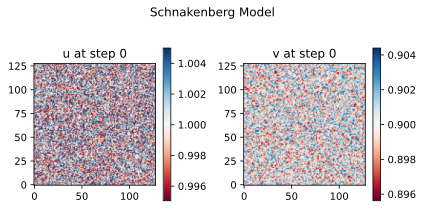

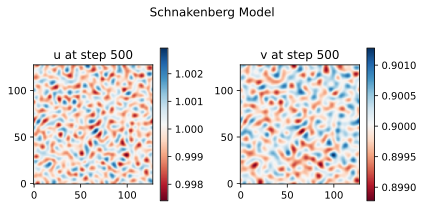

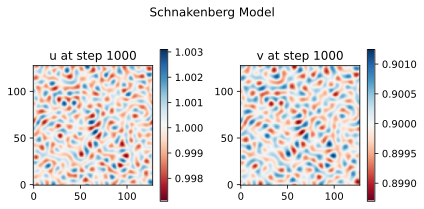

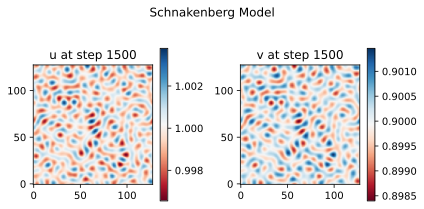

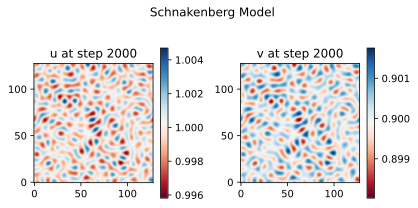

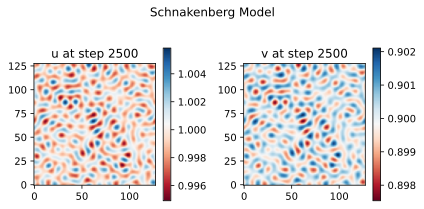

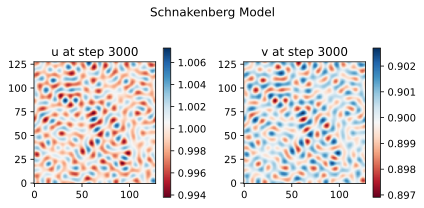

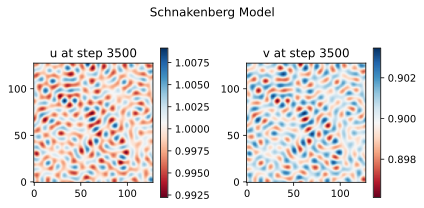

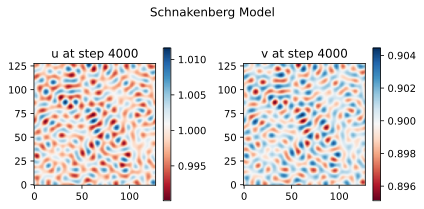

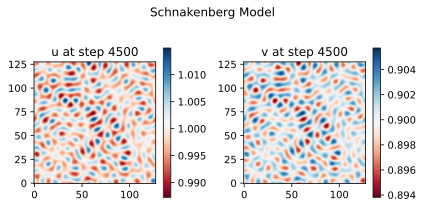

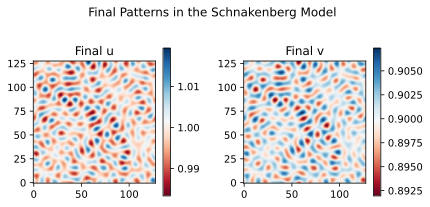

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

# -------------------------------
# Parameters and Domain Settings
# -------------------------------

# Grid size (number of spatial points in each dimension)
N = 128

# Model parameters
a = 0.1
b = 0.9

# Relative diffusion coefficient (should be >1 for a fast-diffusing inhibitor)
d = 10.0

# Time stepping parameters
dt = 0.01            # time step size
n_steps = 5000       # number of time steps to simulate

# ----------------------------
# Steady State and Initial Conditions
# ----------------------------

# Steady state solutions:
# u* = a + b and v* = b / (a + b)^2
u_star = a + b
v_star = b / (u_star**2)

# Initialize u and v with small random perturbations around the steady state
u = u_star + 0.01 * (np.random.random((N, N)) - 0.5)
v = v_star + 0.01 * (np.random.random((N, N)) - 0.5)

# --------------------------------
# Helper Function: Discrete Laplacian
# --------------------------------

def laplacian(Z):
    """
    Compute the Laplacian of array Z using finite differences with periodic boundary conditions.
    """
    return (np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
            np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1) -
            4 * Z)

# --------------------------------
# Time Evolution: Euler Integration
# --------------------------------

# For visualizing the evolution, we store snapshots occasionally.
snapshot_interval = 500

for step in range(n_steps):
    # Calculate the Laplacians for u and v
    lap_u = laplacian(u)
    lap_v = laplacian(v)

    # Reaction terms (the Schnakenberg model)
    # f(u,v) = a + u^2 v - u, g(u,v) = b - u^2 * v
    reaction_u = a + (u**2) * v - u
    reaction_v = b - (u**2) * v

    # Update rules: diffusion plus reaction
    du_dt = lap_u + reaction_u
    dv_dt = d * lap_v + reaction_v

    # Euler update
    u += dt * du_dt
    v += dt * dv_dt

    # Optional: display intermediate results
    if step % snapshot_interval == 0:
        plt.figure(figsize=(6, 3))

        plt.subplot(1, 2, 1)
        plt.imshow(u, cmap='RdBu', origin='lower')
        plt.title(f'u at step {step}')
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(v, cmap='RdBu', origin='lower')
        plt.title(f'v at step {step}')
        plt.colorbar()

        plt.suptitle("Schnakenberg Model")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# ----------------------------
# Final Visualization
# ----------------------------

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(u, cmap='RdBu', origin='lower')
plt.title('Final u')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(v, cmap='RdBu', origin='lower')
plt.title('Final v')
plt.colorbar()

plt.suptitle("Final Patterns in the Schnakenberg Model")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
